# Decision Tree Classification using CHAID - Titanic Survival Prediction

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv(r"train.csv")

In [3]:
train.shape

(891, 12)

In [4]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [7]:
test = pd.read_csv(r"test.csv")

In [8]:
test.shape

(418, 11)

In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploratory Data Analysis


### Variable Description

PassengerId: unique id number to each passenger
Survived: passenger survive(1) or died(0)
Pclass: passenger class
Name: name
Sex: gender
Age: age
SibSp: Number of siblings/spouses
Parch: Number of parent/child
Ticket:ticket number
Fare: amount of money spend to ticket
Cabin: cabin category
Embarked: port where passenger embark (C = Cherbourg, Q = Queenstown, S = Southampton)


Categorical variable:Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp and Parch
Numerical variable: Fare, age and passengerId


In [10]:
train.describe().T.style.background_gradient(cmap='flag')

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000000,446.000000,257.353842,1.000000,223.500000,446.000000,668.500000,891.000000
Survived,891.000000,0.383838,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.000000,2.308642,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Age,714.000000,29.699118,14.526497,0.420000,20.125000,28.000000,38.000000,80.000000
SibSp,891.000000,0.523008,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.000000,0.381594,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891.000000,32.204208,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200


In [11]:
import matplotlib.pyplot as plt;
import seaborn as sns
%matplotlib inline

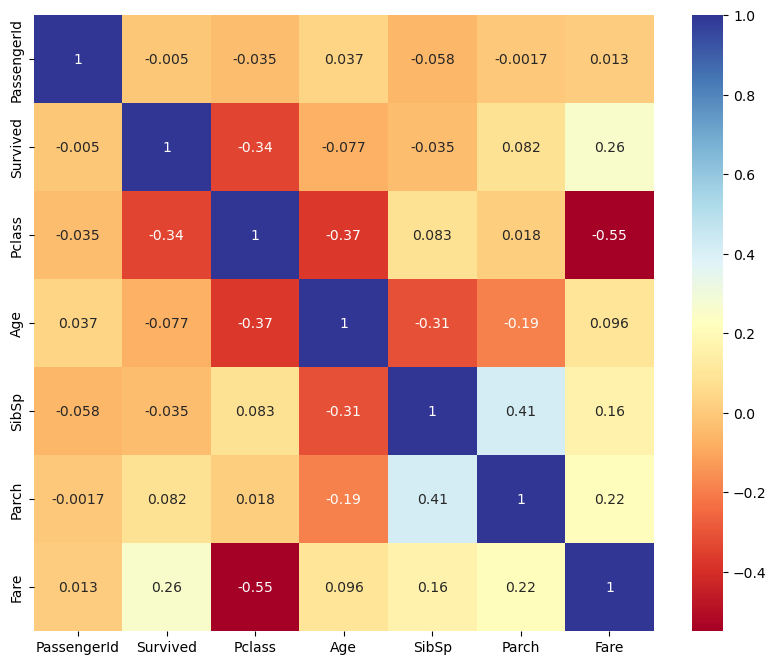

In [12]:
#Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True, cmap='RdYlBu');

-->Pclass or Passenger Class is the most correlated numeric feature with Survived(target) attribute compared with other numeric features.
-->Pclass/Passenger Class and Fare features have significant negative correlation value (0.55) which is as our expectation.
-->SibSp and Parch, these two features have significant positive correlation value (0.41)
-->PassengerId feature has no reasonable correlation with any other features.



In [13]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

Around 20% of the Age data is missing. The fraction of Age missing is most likely modest enough to be replaced reasonably with some type of imputation. Looking at the Cabin column, it appears that we are just lacking too much data to accomplish anything effective with on a basic level. We'll probably remove that eventually or replace it with something else, like "Cabin Known: 1 or 0."

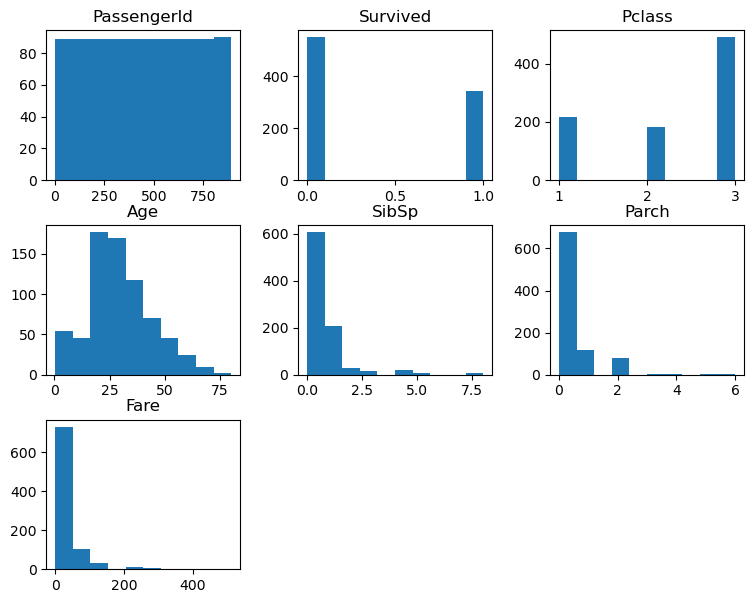

In [14]:
train.hist(bins=10,figsize=(9,7),grid=False);

we can see that Age and Fare are measured on very different scaling. So we need to do feature scaling before predictions.

<AxesSubplot:xlabel='Survived', ylabel='count'>

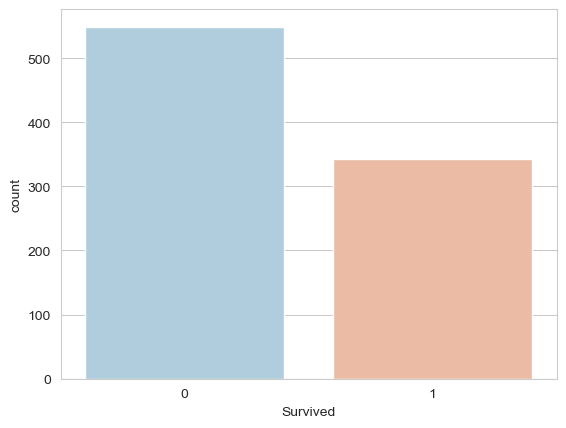

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

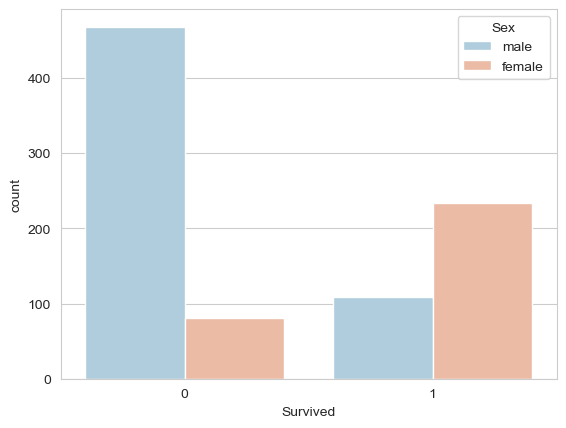

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

Based on the graph, men have a survival rate of roughly 20% while women have a survival rate of around 75%. As a result, whether a passenger is male or female has a significant impact on whether or not he or she will survive.

<AxesSubplot:xlabel='Survived', ylabel='count'>

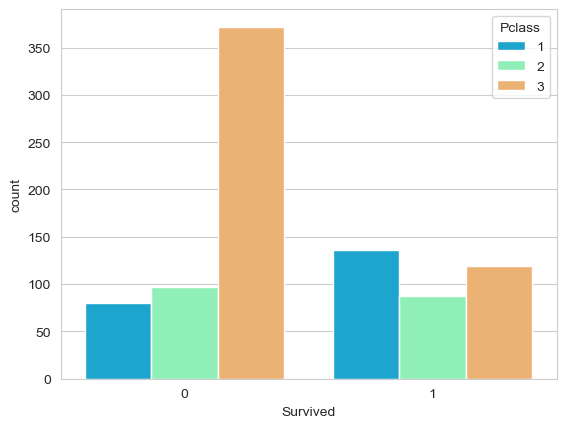

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

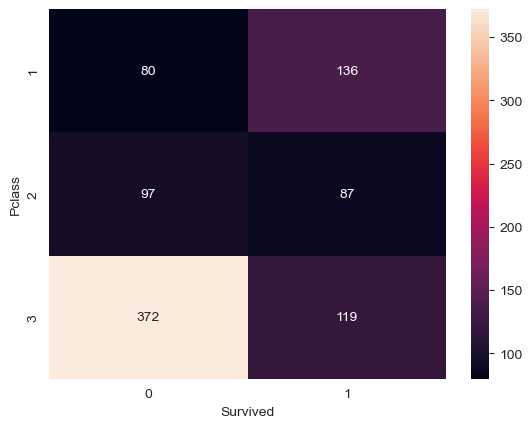

In [18]:
group = train.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()

# Heatmap
sns.heatmap(pclass_survived, annot = True, fmt ="d")


It is used to determine if higher-class passengers had a greater survival rate than lower-class passengers or vice versa. Passengers in class 1 have a better probability of surviving than those in classes 2 and 3. That means that Pclass has a significant impact on a passenger's chances of survival.

In [19]:
print('Oldest person Survived was of:',train['Age'].max())
print('Youngest person Survived was of:',train['Age'].min())
print('Average person Survived was of:',train['Age'].mean())



Oldest person Survived was of: 80.0
Youngest person Survived was of: 0.42
Average person Survived was of: 29.69911764705882


The oldest person survived is of age 80, the youngest person survived is around 4 months of age and the average of survived age group is 29 years

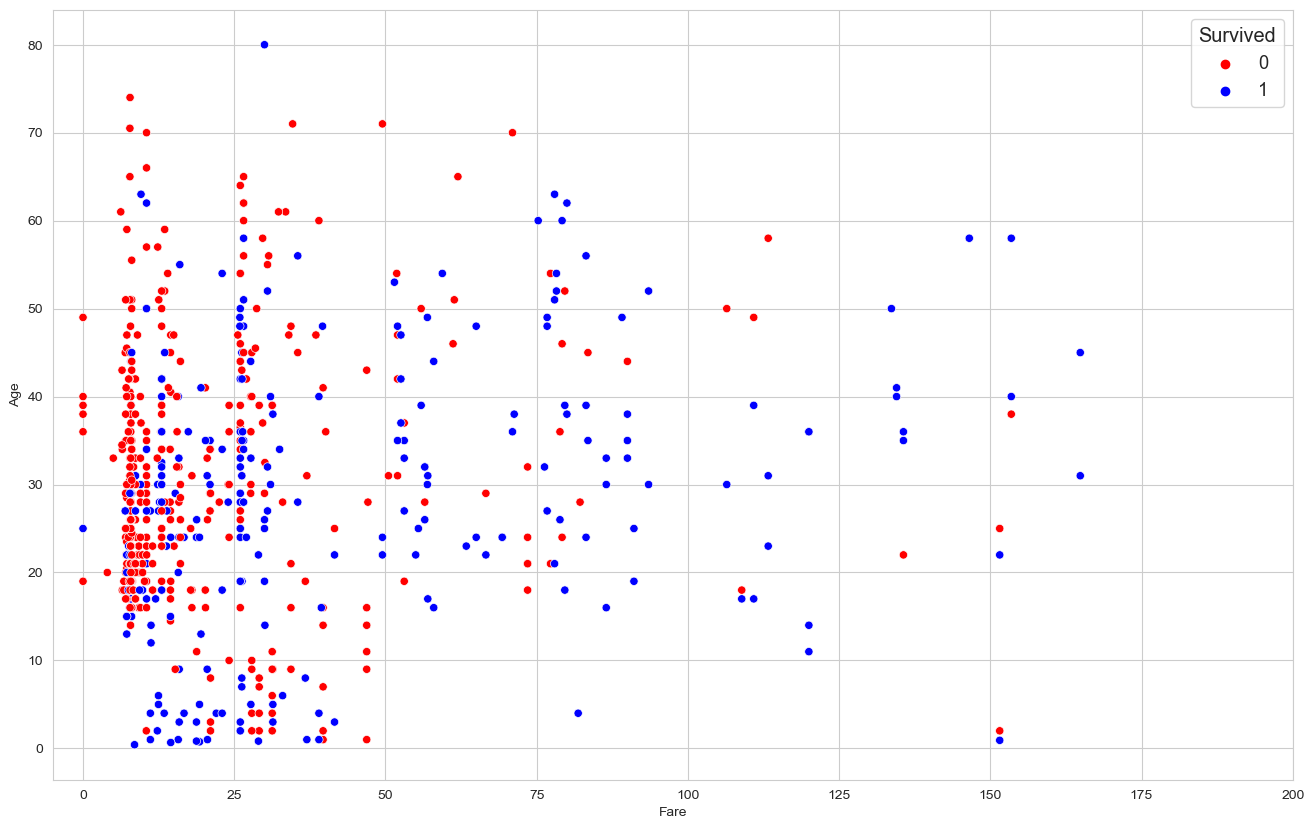

In [20]:
fig, ax = plt.subplots(figsize=(16,10))
plt.xlim(-5,200)

with sns.plotting_context('notebook',font_scale=1.2):

    ax = sns.scatterplot(
        x='Fare',
        y='Age',
        hue='Survived',
        palette=['red','blue'],
        data=train,
        ax=ax
    )

This seaborn scatterplot provides a fairly good depiction of the different tiered fares, as well as the density of passengers with specific fares and ages. Fares above $200 have been excluded for scalability considerations. The colour red denotes that the passenger died, whereas the colour blue indicates that the person survived. We can easily see that the highest density of deaths happened among lower-tier priced travellers aged 17 to 45. We can observe that there is a trend towards survival when fares rise and age falls.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

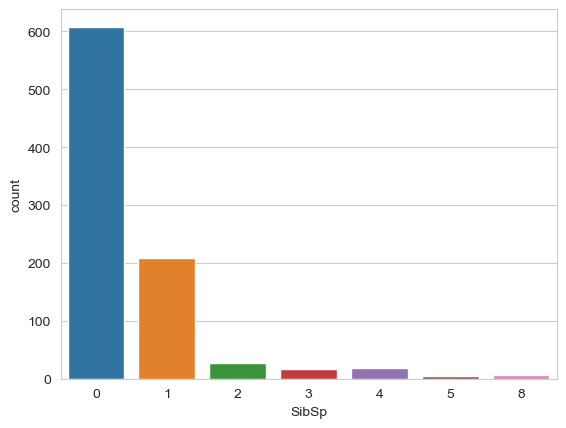

In [21]:
sns.countplot(x='SibSp',data=train)

Here is the count plot of sibsp. 
SibSip feature indicates that whether a person is alone or with his family. Siblings=brother,sister, etc and Spouse= husband,wife


In [22]:
pd.crosstab([train.SibSp],train.Survived).style.background_gradient('summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [23]:
pd.crosstab(train.SibSp,train.Pclass).style.background_gradient('summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


This section has a intriguing information. According to the Barplot and FactorPlot, if a passenger is alone on the ship with no siblings, the survival percentage is 34.5%. As the number of siblings grows, so does the graph. This is intriguing because if I had a family onboard, I will save them rather than myself. But there's a problem: the survival rate for families with 5-8 members is 0%. Is this due of PClass? Yeah, this is PClass. The crosstab reveals that everyone with SibSp>3 was in PClass3. All of the huge families in Pclass3 (>3) are on the verge of dying.

<AxesSubplot:xlabel='Parch', ylabel='count'>

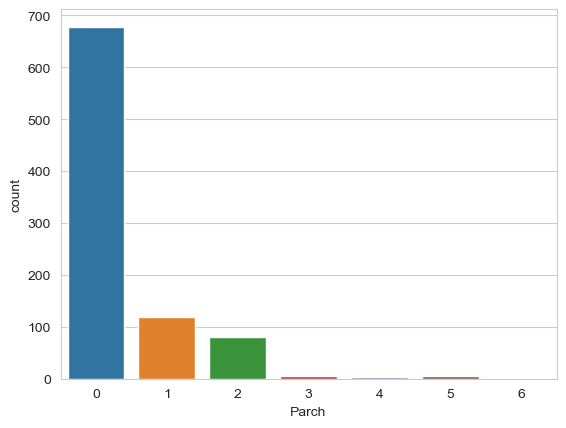

In [24]:
sns.countplot(x='Parch',data=train)

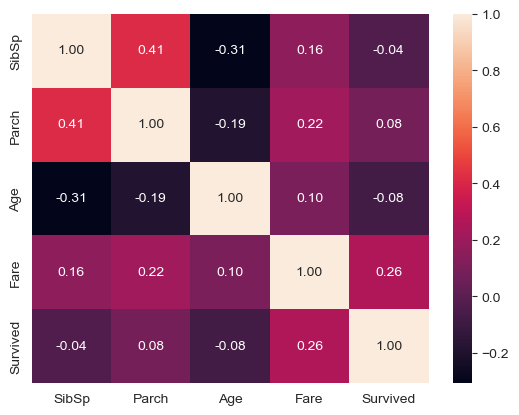

In [25]:
list1 = ["SibSp" , "Parch" , "Age" , "Fare" , "Survived"]
sns.heatmap(train[list1].corr(), annot = True, fmt = ".2f")
plt.show()

Fare feature seems to have correlation with survived feature (0.26)

In [26]:
def bar_plot(attribute, data, color, title, size, space, comparison = None, comparison_order=None):
    plt.figure(figsize=size)
    if comparison == None:
        ax = sns.countplot(x = attribute, data = data, palette=color)
    else:
        ax = sns.countplot(x = attribute, hue = comparison, hue_order=comparison_order, data = data, palette=color)
    total = len(data)
    
    for i in ax.patches:
        percentage = ' '*space + '{:.2f}%'.format((i.get_height()/total)*100)
        x = i.get_x()
        y = i.get_height()
        ax.annotate(percentage, (x,y))
    plt.title(title, size = 20)

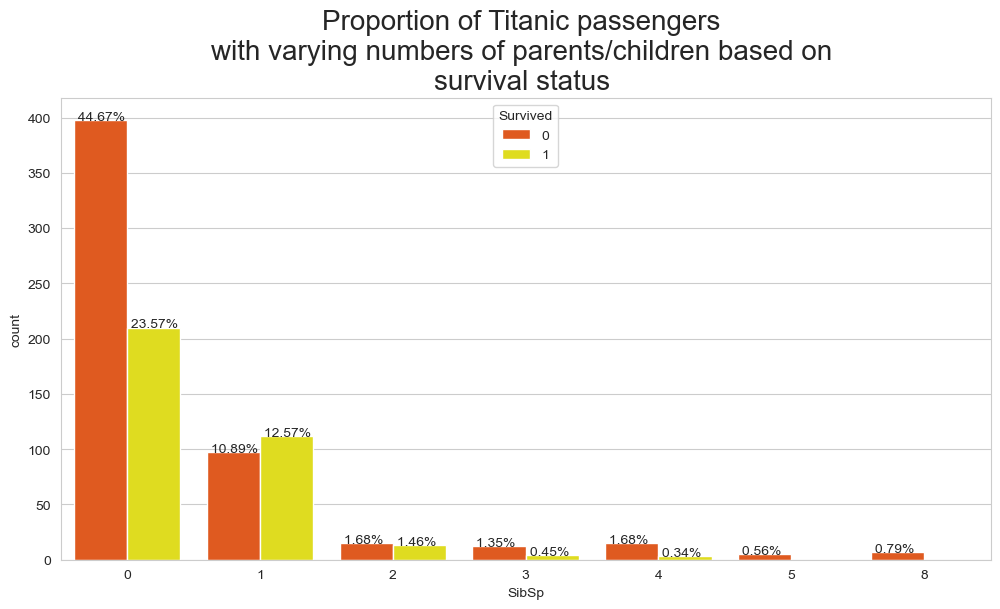

In [27]:
bar_plot('SibSp', train, ['#ff4d00', '#fffb00'],
         "Proportion of Titanic passengers \nwith varying numbers of parents/children based on \nsurvival status ",
         (12, 6), 1, 'Survived')

45% of the total passengers in Titanic who were travelling alone (i.e., not travelling with their siblings/spouses) not able to survive.

# Data Cleaning

### Handling Missing Values 

Instead of just removing the missing age data rows, we wish to fill them in. One method is to enter the average age of all passengers (imputation). We may, however, be wiser about it and look at the average age by passenger class. 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

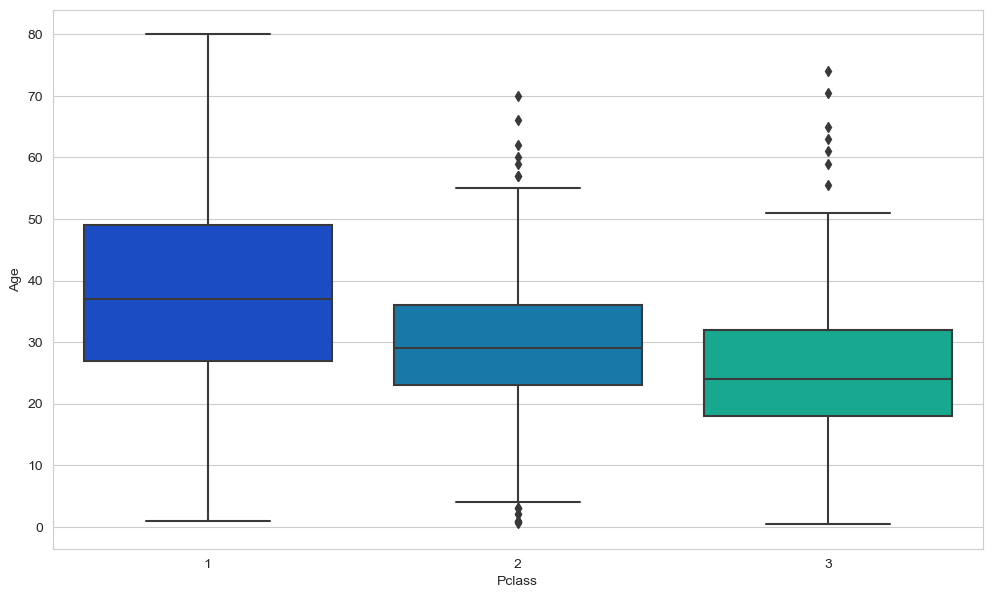

In [28]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

The richer passengers in the higher classes are older, which makes sense. We'll infer based on Pclass for Age using these average age values.

In [29]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [30]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [31]:
train['Embarked'] = train['Embarked'].fillna('S')


In [32]:
train.drop('Cabin',axis=1,inplace=True)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [34]:
train.dropna(inplace=True)

# Converting Categorical Features

We'll need to use pandas to convert category features to dummy variables! Otherwise, our machine learning system will be unable to use those attributes directly as inputs.

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [36]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [37]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [38]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [39]:
train = pd.concat([train,sex,embark],axis=1)

In [40]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [41]:
X = train.drop('Survived', axis=1)
y = train['Survived']
X = np.array(X)
y = np.array(y)

In [42]:
import numpy as np

class Node:
    
    def __init__(self, feature=None, threshold=None, chi2=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.chi2 = chi2
        self.left = left
        self.right = right
        self.value = value

In [43]:
class DecisionTree:
    
    def __init__(self, alpha=0.05, min_samples=3,max_depth=7):
        self.alpha = alpha
        self.min_samples = min_samples
        self.max_depth = max_depth
        self.tree = None
    
    def fit(self, X, y):
        self.tree = self._build_tree(X, y)
    
    
    def predict(self, X):
        y_pred = np.apply_along_axis(lambda x: self._traverse_tree(self.tree, x), 1, X)
        return y_pred

    def _traverse_tree(self, node, x):
        if node.feature is None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(node.left, x)
        else:
            return self._traverse_tree(node.right, x)
    
    def _build_tree(self, X, y):
        if X.shape[0] <= self.min_samples:
            return Node(value=self._get_leaf_value(y))
        
        # Split the data into two branches
        best_feature, best_threshold, best_chi2 = self._get_best_split(X, y)
        if best_feature is None:
            return Node(value=self._get_leaf_value(y))
        
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask
        left_tree = self._build_tree(X[left_mask], y[left_mask])
        right_tree = self._build_tree(X[right_mask], y[right_mask])
        
        return Node(feature=best_feature, threshold=best_threshold, chi2=best_chi2, left=left_tree, right=right_tree)
    
    def _get_best_split(self, X, y):
        best = (None, None, 0)
        thresholds_func = lambda sorted_X: (sorted_X[1:] + sorted_X[:-1]) / 2
    
        for feature in range(X.shape[1]):
            sorted_X = np.sort(X[:, feature])
            thresholds = thresholds_func(sorted_X)
            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask
                if left_mask.sum() < self.min_samples or right_mask.sum() < self.min_samples:
                    continue
                chi2 = self._get_chi2(y, left_mask, right_mask)
                if chi2 > best[2]:
                    best = (feature, threshold, chi2)
    
        return best if best[0] is not None else (None, None, None)


    def _get_chi2(self, y, left_mask, right_mask):
        observed = np.array([
            [np.sum(y[left_mask] == 0), np.sum(y[left_mask] == 1)],
            [np.sum(y[right_mask] == 0), np.sum(y[right_mask] == 1)]
        ])
        expected = np.array([
            [np.sum(left_mask) * np.sum(y == 0), np.sum(left_mask) * np.sum(y == 1)],
            [np.sum(right_mask) * np.sum(y == 0), np.sum(right_mask) * np.sum(y == 1)]
        ]) / y.shape[0]
        chi2 = np.sum((observed - expected) ** 2 / expected)
        return chi2
    
    def _get_leaf_value(self, y):
        return np.bincount(y).argmax()


# Split the data into train and test sets

In [44]:
def train_test_split(X, y, test_size=0.3, random_state=None):
    if random_state:
        np.random.seed(random_state)
    shuffle_indices = np.random.permutation(len(X))
    test_size = int(test_size * len(X))
    test_indices = shuffle_indices[:test_size]
    train_indices = shuffle_indices[test_size:]
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [45]:
classifier = DecisionTree()

In [46]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [47]:
import time
# record start time
start_time = time.time()

In [48]:
classifier.fit(X_train , y_train)

In [49]:
y_pred = classifier.predict(X_test)

In [50]:
# record end time
end_time = time.time()

# calculate the time taken to fit the model
time_taken = end_time - start_time

# print the time taken
print("Time taken to run the code: {:.2f} seconds".format(time_taken))

Time taken to run the code: 2.97 seconds


In [51]:
y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0], dtype=int64)

### Evaluation Metrics

In [52]:
# Calculate TP, FP, FN, TN
TP = np.sum((y_test == 1) & (y_pred == 1))
FP = np.sum((y_test == 0) & (y_pred == 1))
FN = np.sum((y_test == 1) & (y_pred == 0))
TN = np.sum((y_test == 0) & (y_pred == 0))

# Create confusion matrix
confusion_matrix = np.array([[TP, FP], [FN, TN]])
print(confusion_matrix)

# Calculate accuracy, recall, precision, and F-score
accuracy= (TP + TN) / (TP + TN + FP + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)
fscore = 2 * (precision * recall) / (precision + recall)

print("Accuracy",accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F-score:", fscore) 

[[ 75  23]
 [ 35 134]]
Accuracy 0.7827715355805244
Recall: 0.6818181818181818
Precision: 0.7653061224489796
F-score: 0.721153846153846
